In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from shapely.geometry import MultiPoint, mapping
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("./notebook/research/random_point.csv", sep="\t")

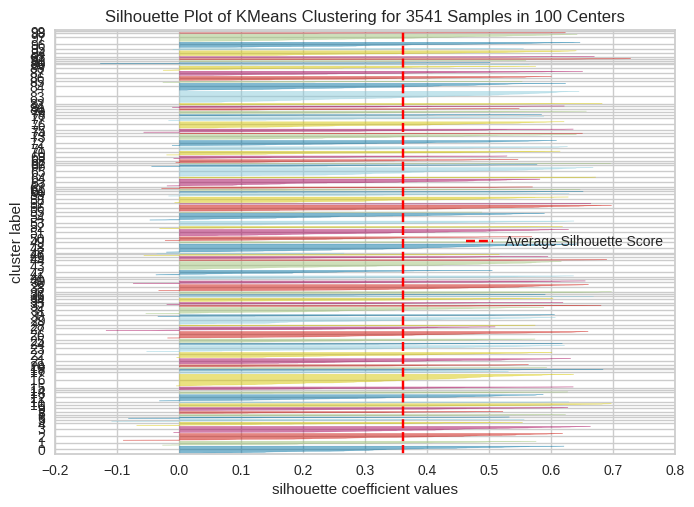

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3541 Samples in 100 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
kmeans= KMeans(n_clusters=100, max_iter=1000, random_state=123)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df[["POINT_X", "POINT_Y"]])
visualizer.show() # 실루엣 스코어 확인

In [22]:
model = KMeans(n_clusters=100, max_iter=1000, random_state=123)
label = model.fit_predict(df[["POINT_X", "POINT_Y"]])
centers = model.cluster_centers_
df["cluster"] = label

In [34]:
cmap = plt.cm.get_cmap('hsv', 100)
colors = [mcolors.rgb2hex(cmap(i)) for i in range(100)]

seoul = folium.Map(location=[37.566734, 126.978123], zoom_start=7.5)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['POINT_Y'], row['POINT_X']],
        radius=3,
        color=colors[row['cluster']],
        fill=True,
        fill_opacity=0.7
    ).add_to(seoul)

for i, (Y, X) in enumerate(centers):
    folium.Marker(
        location=[X, Y],
         icon=folium.DivIcon(html=f"""
            <div style="
                font-size:20px;
                color:{colors[i]};
                font-weight:bold;
                line-height:40px;
            ">
                ★
            </div>
        """),
        popup=f'Center {i}'
    ).add_to(seoul)

for cluster_id in range(100):
    pts = df[df['cluster'] == cluster_id][['POINT_X','POINT_Y']].values
    if len(pts) >= 3:
        hull = MultiPoint(pts).convex_hull
        folium.GeoJson(
            mapping(hull),
            style_function=lambda feature, cid=cluster_id: {
                'fillColor': colors[cid],
                'color': colors[cid],
                'weight': 1,
                'fillOpacity': 0.1
            }
        ).add_to(seoul)

In [35]:
seoul

Output hidden; open in https://colab.research.google.com to view.